In [1]:
import os
import sys
cur_dir = os.getcwd()
ASREp_dir = os.path.join(os.path.dirname(os.path.dirname(cur_dir)))
sys.path.append(ASREp_dir)
import ASREp.ground_deformation_models as gdm
import ASREp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

In [2]:
def prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX):
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)
    # Add the left half of Ux-GF and Uz-GF
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)

    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)
    return dispX_gf/1000, dispZ_gf/1000

def plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el = None):
    
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)

    dispL_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux.csv")
    dispL_asre_Franza = pd.read_csv(dispL_asre_file, header=None)

    dispV_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz.csv")
    dispV_asre_Franza = pd.read_csv(dispV_asre_file, header=None)

    # Sort the disp in file from left to right
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispL_asre_Franza.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispL_asre_Franza = pd.concat([left_half, dispL_asre_Franza])
    dispL_asre_Franza = dispL_asre_Franza.sort_values(by = 0).reset_index(drop = True)

    left_half = dispV_asre_Franza.copy()
    left_half[0] = -left_half[0]
    dispV_asre_Franza = pd.concat([left_half, dispV_asre_Franza])
    dispV_asre_Franza = dispV_asre_Franza.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)

    f = interpolate.interp1d(dispL_asre_Franza[0], dispL_asre_Franza[1], fill_value='extrapolate')
    dispL_asre_Franza = f(beamX)

    f = interpolate.interp1d(dispV_asre_Franza[0], dispV_asre_Franza[1], fill_value='extrapolate')
    dispV_asre_Franza = f(beamX)
    
    axes[0].plot(beamX, dispX_gf, 'r:', label = 'experiment')
    axes[1].plot(beamX, dispZ_gf, 'r:', label = 'experiment')

    axes[0].plot(beamX, dispL_asre_Franza, 'b', label = 'ASRE_Franza')
    axes[1].plot(beamX, dispV_asre_Franza, 'b', label = 'ASRE_Franza')
    
    if model_el is not None:
        axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREp_ep')
        axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREp_ep')

        axes[0].plot(beamX, model_el.beam_DispL*1000, 'b^', label = 'ASREp_el')
        axes[1].plot(beamX, model_el.beam_DispV*1000, 'b^', label = 'ASREp_el')
    else:
        axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREp')
        axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREp')


    axes[0].legend()
    axes[1].legend()

    axes[0].set_title(f'{beam_id}, Ux')
    axes[1].set_title(f'{beam_id}, Uz')

    axes[0].set_xlim([0, 15])
    axes[1].set_xlim([0, 15])
    axes[0].set_ylim([-60, 36])
    axes[1].set_ylim([-60, 36])

In [3]:
val_data_dir = r"VerificationData"

In [4]:
# STR-1, vl = 0.5
beam_id = "STR-1"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 0.5/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

# fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
#                                     figsize=(12, 6))

# axes[0].plot(beamX, dispX_gf, label = 'experiment')
# axes[1].plot(beamX, dispZ_gf, label = 'experiment')

# s_max = -np.min(dispZ_gf)
# D = np.sqrt(s_max*k*z0/0.313/vl)
# print(D)

# dispV, dispH = gdm.ground_disp_Mair_1993(beamX, z0, k, D, vl)

# axes[0].plot(beamX, dispH, label = 'Gaussian')
# axes[1].plot(beamX, dispV, label = 'Gaussian')

# axes[0].legend()
# axes[1].legend()

In [5]:
dfoot = 0.12
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 3.2*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'strain+disp')

True

In [6]:
dfoot = 0.12
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 3.2*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'strain+disp')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'strain+disp')

True

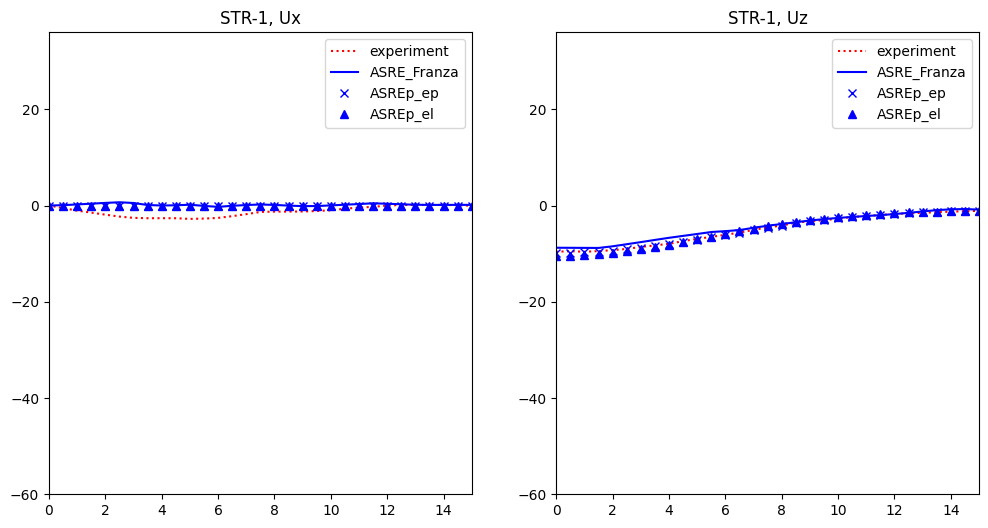

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

In [8]:
# STR-1, vl = 2.0
beam_id = "STR-1"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 2.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

dfoot = 0.12
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 3.2*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'strain+disp+force')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'strain+disp+force')


True

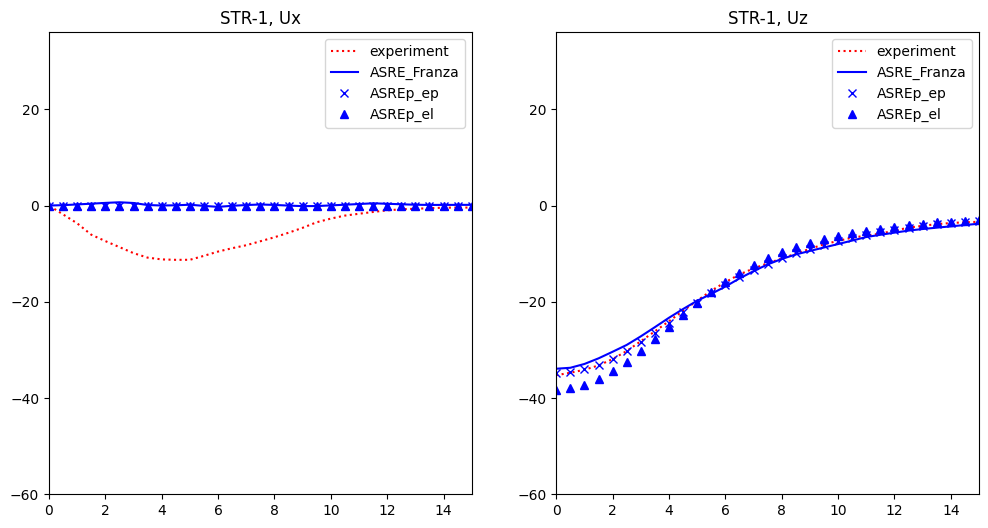

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

In [10]:
# STR-1, vl = 4.0
beam_id = "STR-1"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 4.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

dfoot = 0.12
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 3.2*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

True

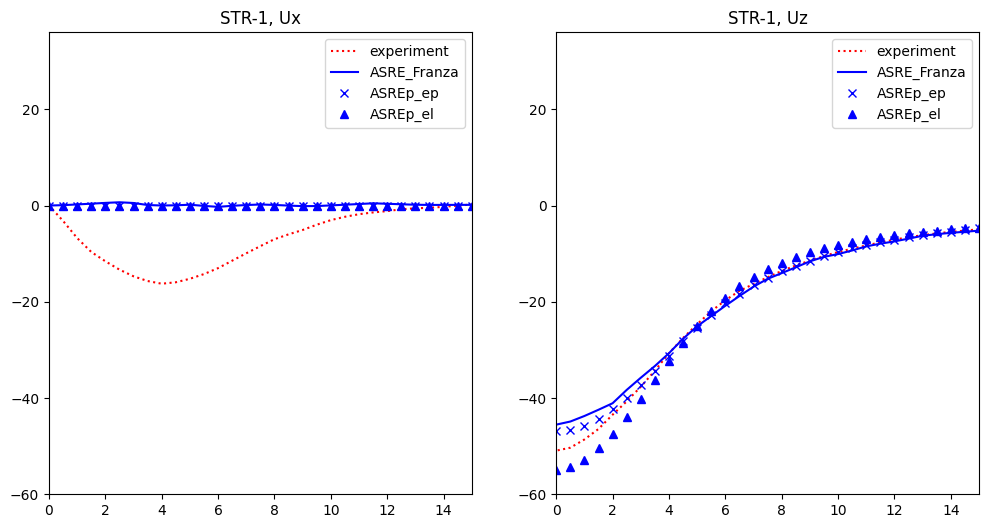

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

In [12]:
# STR-4, vl = 4.0
beam_id = "STR-4"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 4.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

dfoot = 1.5
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 40.5*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

True

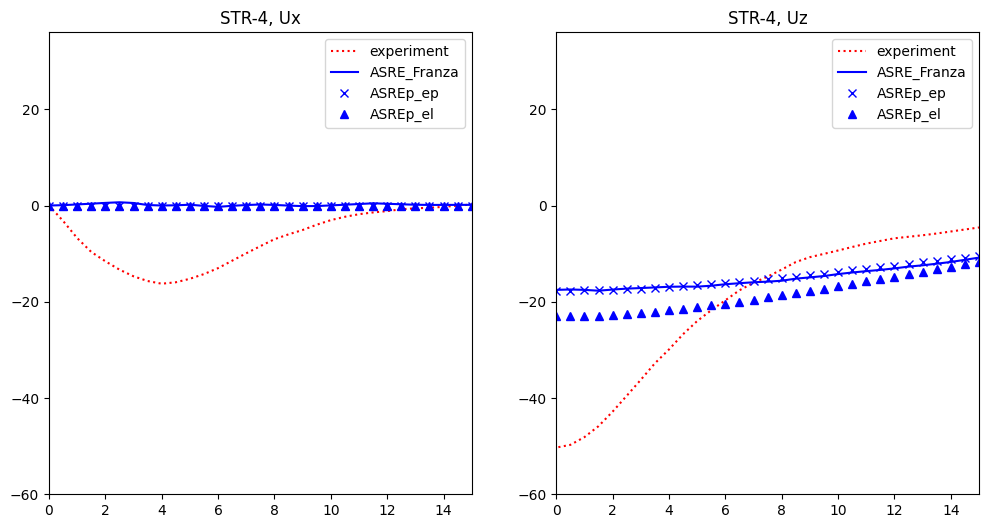

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

In [14]:
# STR-4, vl = 2.0
beam_id = "STR-4"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 2.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

dfoot = 1.5
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 40.5*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

True

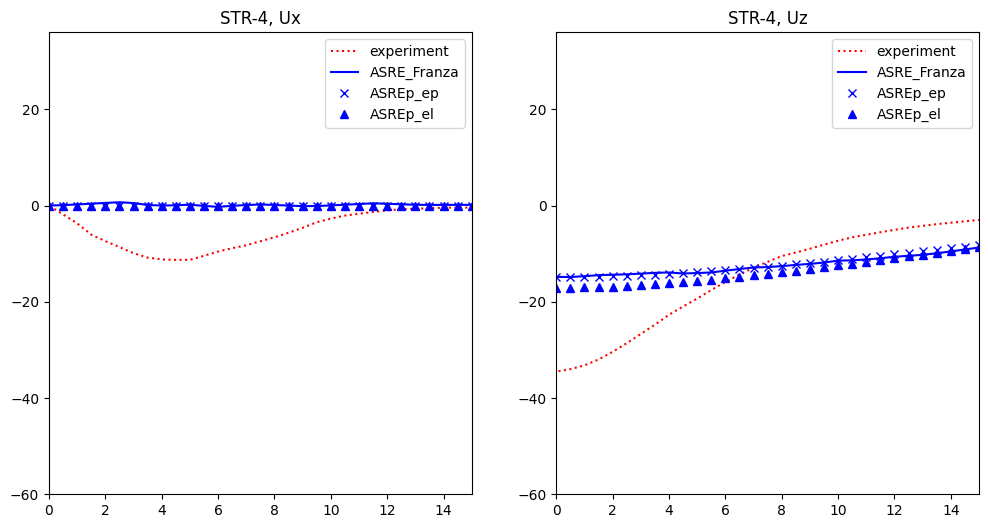

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

In [16]:
# STR-4, vl = 0.5
beam_id = "STR-4"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 2.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)

dfoot = 1.5
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 40.5*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
model.set_beam_properties(Eb, EoverG, qfoot)
model.set_soil_properties(Es, nis, mu_int)

model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
model_el.set_beam_properties(Eb, EoverG, qfoot)
model_el.set_soil_properties(Es, nis, mu_int)

model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

True

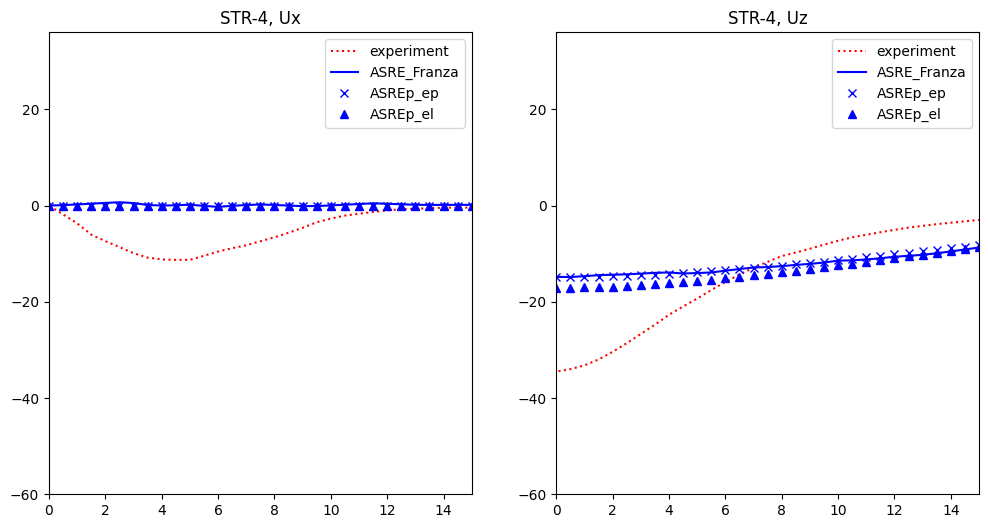

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el)

Text(0.5, 1.0, 'Tensile strain')

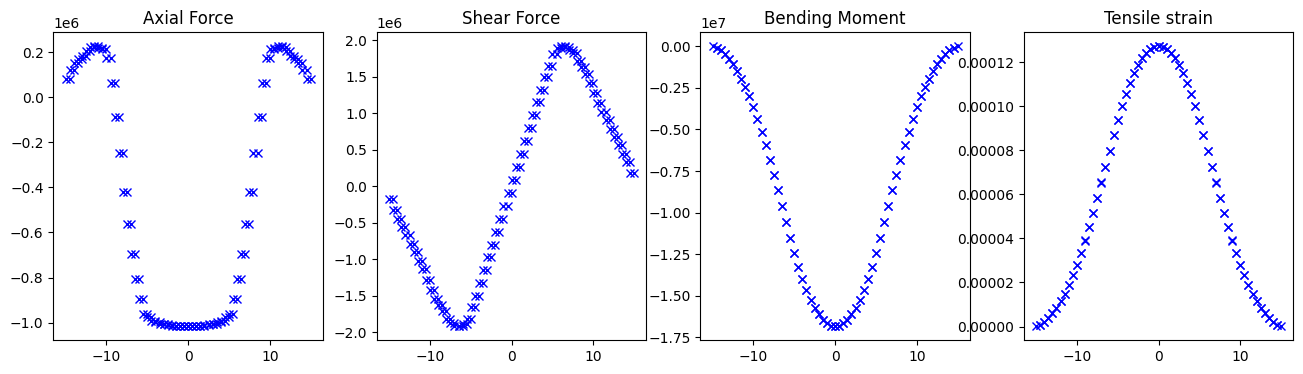

In [18]:
# Plot the internal forces
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, 
                                        figsize=(16, 4))
axes[0].plot(beamX[:-1], model.axialForce[::2], 'bx', label = 'Axial Force ASREp')
axes[0].plot(beamX[1:], model.axialForce[1::2], 'bx', label = 'Axial Force ASREp')
axes[0].set_title('Axial Force')

axes[1].plot(beamX[:-1], model.shearForce[::2], 'bx', label = 'Shear Force ASREp')
axes[1].plot(beamX[1:], model.shearForce[1::2], 'bx', label = 'Shear Force ASREp')
axes[1].set_title('Shear Force')

axes[2].plot(beamX[:-1], model.moment[::2], 'bx', label = 'Bending Moment ASREp')
axes[2].plot(beamX[1:], model.moment[1::2], 'bx', label = 'Bending Moment ASREp')
axes[2].set_title('Bending Moment')

axes[3].plot(beamX[:-1], model.eps_t[::2], 'bx', label = 'Tensile strain ASREp')
axes[3].plot(beamX[1:], model.eps_t[1::2], 'bx', label = 'Tensile strain ASREp')
axes[3].set_title('Tensile strain')